In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [2]:
file = open("Ecommerce Electronics.txt", "r", encoding = "utf8") ##book1 (2) the final one

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
    data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'"Apple MacBook Air Core i5 13.3-inch Laptop (8GB/128GB/MacOS Sierra/Silver/1.35kg), MQD32HN/A MacBook Air lasts up to an incredible 12 hours between charges. So from your morning coffee to your evening commute, you can work unplugged. When it’s time to kick back and relax, you can get up to 12 hours of iTunes movie playback. And with up to 30 days of standby time, you can go away for weeks and pick up where you left off.Whatever the task, fifth-generation Intel Core i5 and i7 processors with Int'

In [3]:
len(data)

836662

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[293, 1172, 378, 720, 1692, 947, 24, 93, 166, 1173, 5849, 2947, 3936, 539, 12]

In [5]:
len(sequence_data)

138482

In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

6831


In [7]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  138479


array([[ 293, 1172,  378,  720],
       [1172,  378,  720, 1692],
       [ 378,  720, 1692,  947],
       [ 720, 1692,  947,   24],
       [1692,  947,   24,   93],
       [ 947,   24,   93,  166],
       [  24,   93,  166, 1173],
       [  93,  166, 1173, 5849],
       [ 166, 1173, 5849, 2947],
       [1173, 5849, 2947, 3936]])

In [8]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [9]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 293 1172  378]
 [1172  378  720]
 [ 378  720 1692]
 [ 720 1692  947]
 [1692  947   24]
 [ 947   24   93]
 [  24   93  166]
 [  93  166 1173]
 [ 166 1173 5849]
 [1173 5849 2947]]
Response:  [ 720 1692  947   24   93  166 1173 5849 2947 3936]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             68310     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 6831)              6837831   
                                                                 
Total params: 19,955,141
Trainable params: 19,955,141
Non-trainable params: 0
_________________________________________________________________


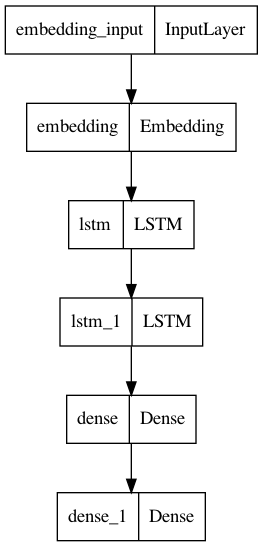

In [13]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=30, batch_size=64, callbacks=[checkpoint])

Epoch 1/30
2164/2164 [==============================] - ETA: 0s - loss: 6.8683
Epoch 1: loss improved from inf to 6.86832, saving model to next_words.h5
2164/2164 [==============================] - 386s 177ms/step - loss: 6.8683
Epoch 2/30
2164/2164 [==============================] - ETA: 0s - loss: 5.8195
Epoch 2: loss improved from 6.86832 to 5.81954, saving model to next_words.h5
2164/2164 [==============================] - 395s 183ms/step - loss: 5.8195
Epoch 3/30
2164/2164 [==============================] - ETA: 0s - loss: 4.7424
Epoch 3: loss improved from 5.81954 to 4.74245, saving model to next_words.h5
2164/2164 [==============================] - 389s 180ms/step - loss: 4.7424
Epoch 4/30
2164/2164 [==============================] - ETA: 0s - loss: 3.8027
Epoch 4: loss improved from 4.74245 to 3.80266, saving model to next_words.h5
2164/2164 [==============================] - 387s 179ms/step - loss: 3.8027
Epoch 5/30
2164/2164 [==============================] - ETA: 0s - loss: 